# Heart Disease Research

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load data
heart = pd.read_csv('heart_disease.csv')

# Inspect data
print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


## Predictors of Heart Disease

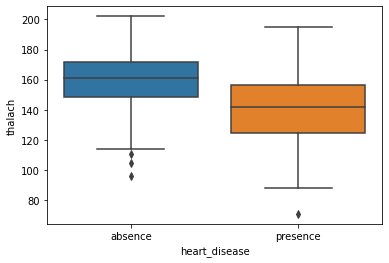

In [3]:
# Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease?
# Box plot of `thalach` based on heart disease
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show()

In [4]:
# Save `thalach` for hd patients and non-hd patients
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

In [5]:
# Calculate and print mean difference
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print('`thalach` mean Difference: ', mean_diff)

`thalach` mean Difference:  19.11905597473242


In [6]:
# Calculate and print median difference
med_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print('`thalach` median Difference: ', med_diff)


`thalach` median Difference:  19.0


In [7]:
# We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.
# Run two-sample t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('p-value for `thalach` two-sample t-test: ', pval)

p-value for `thalach` two-sample t-test:  3.456964908430172e-14


Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.  
**Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.**

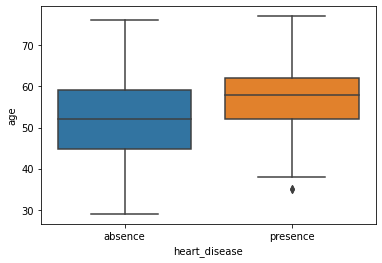

`age` mean Difference:  4.040533426917001
`age` median Difference:  6.0
p-value for `age` two-sample t-test:  8.955636917529706e-05


In [8]:
# Using the same process, investigate at least one other quantitative variable.
# Age
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']
mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
print('`age` mean Difference: ', mean_diff)
med_diff = np.median(age_hd) - np.median(age_no_hd)
print('`age` median Difference: ', med_diff)
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for `age` two-sample t-test: ', pval)

## Chest Pain and Max Heart Rate

Let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease.

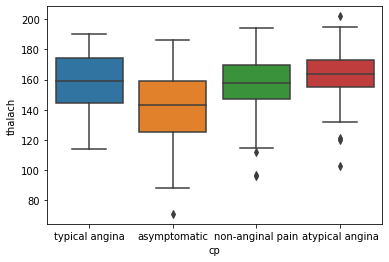

In [10]:
# Box plot of `thalach` based on `cp`
plt.clf()
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.show()

In [11]:
# Save `thalach` based on `cp`
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

In [12]:
# Run ANOVA
from scipy.stats import f_oneway
Fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('p-value for ANOVA: ', pval)

p-value for ANOVA:  1.9065505247705008e-10


In [14]:
# Contingency table of heart disease vs cp
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [15]:
# Run chi-square test
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ', pval)

p-value for chi-square test:  1.2517106007837527e-17


Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.  
**Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.**